**Extract video fragment (Ноутбук для извлечения видео-фрагмента из видео)**

https://drive.google.com/file/d/1yRUeglslQaSH4zhIUT-iijr7F0MsY9hg

## **Сервисные функции**

In [ ]:
import os
import shutil

# @title Функция удаления всех папок и файлов в directory
def delete_all_files_and_folders(directory):
    try:
        # Переход в указанную директорию
        os.chdir(directory)

        # Удаление всех файлов и папок
        for file in os.listdir():
            file_path = os.path.join(directory, file)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print(f"Failed to delete {file_path}. Reason: {e}")

        print(f"All files and folders in {directory} have been deleted.")
    except Exception as e:
        print(f"Failed to delete files and folders. Reason: {e}")


## **Предварительные действия**

In [ ]:
!nvidia-smi


Wed Dec 27 16:58:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
# @title Удаление всех папок и файлов в root_path
delete_all_files_and_folders(HOME)


All files and folders in /content have been deleted.


## **Установка YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
import glob
from IPython.display import Image, display
import shutil
import os


## **Обнаружение объектов и сегментация**

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title Определение путей для использования лучшей модели best.pt с Google Disk
# Базовый путь, где хранится модель
base_path = '/content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/'

last_best_path = f"{base_path}Last_Best/"

test_predict_path = f"{base_path}178.31.03.2023/Fragment_Original/"
output_path = f"{base_path}178.31.03.2023/Fragment_Predict/"

print(f'Путь, где сохранена модель: {last_best_path}')

# Минимальная вероятность обнаружения
min_conf = 0.5


Путь, где сохранена модель: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Last_Best/


In [ ]:
# @title Параметры по умолчанию (сегментация с рамками, названиями классов и вероятностью их обнаружения)

!yolo task=segment mode=predict model={last_best_path}best.pt source='{test_predict_path}' conf={min_conf} save=True


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 9 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 6 lawns, 1 pits-with-water, 8 roadss, 399.1ms
video 1/1 (2/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 13 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 6 lawns, 1 pits-with-water, 8 roadss, 35.2ms
video 1/1 (3/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 12 buil

In [ ]:
# Исходный путь
source_folder = f'{HOME}/runs/segment/predict/'
output_path_1 = f"{output_path}predict1/"
print(f'output_path: {output_path_1}')

# @title Копирование папки predict в папку output_path_1

# Создаем целевую директорию, если она еще не существует
os.makedirs(output_path_1, exist_ok=True)

# Копирование файлов из source_folder в output_path_1
for file_name in os.listdir(source_folder):
    source_file = os.path.join(source_folder, file_name)
    destination_file = os.path.join(output_path_1, file_name)
    shutil.copy2(source_file, destination_file)


output_path: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Predict/predict1/


In [ ]:
# @title Только сегментация. Параметр boxes=False

!yolo task=segment mode=predict model={last_best_path}best.pt source='{test_predict_path}' conf={min_conf} save=True boxes=False


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (1/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 9 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 6 lawns, 1 pits-with-water, 8 roadss, 145.4ms
video 1/1 (2/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 13 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 6 lawns, 1 pits-with-water, 8 roadss, 30.9ms
video 1/1 (3/1500) /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Original/video_fragment.mp4: 384x640 2 building-sites, 4 buildings-childrens, 12 buildings-residentials, 2 grounds-plays, 3 gro

In [ ]:
# Исходный путь
source_folder = f'{HOME}/runs/segment/predict2/'
output_path_2 = f"{output_path}predict2/"
print(f'output_path: {output_path_2}')

# @title Копирование папки predict2 в папку output_path_2

# Создаем целевую директорию, если она еще не существует
os.makedirs(output_path_2, exist_ok=True)

# Копирование файлов из source_folder в output_path_2
for file_name in os.listdir(source_folder):
    source_file = os.path.join(source_folder, file_name)
    destination_file = os.path.join(output_path_2, file_name)
    shutil.copy2(source_file, destination_file)


output_path: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/178.31.03.2023/Fragment_Predict/predict2/


## **Вывод:**

**Качество обнаружения и сегментации городских объектов на видео вполне удовлетворительно по сравнению с видео-фрагментом, на котором было обучение нейро-модели 🌝**

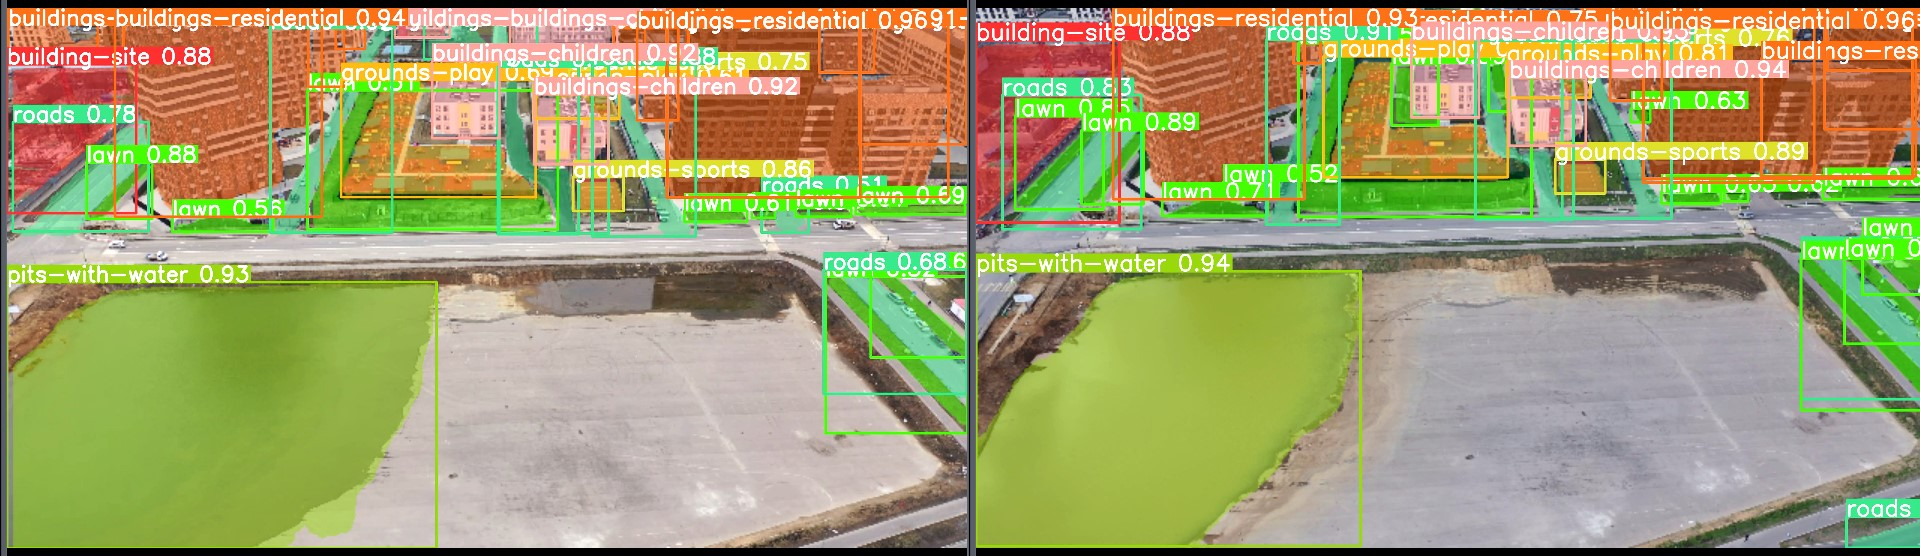

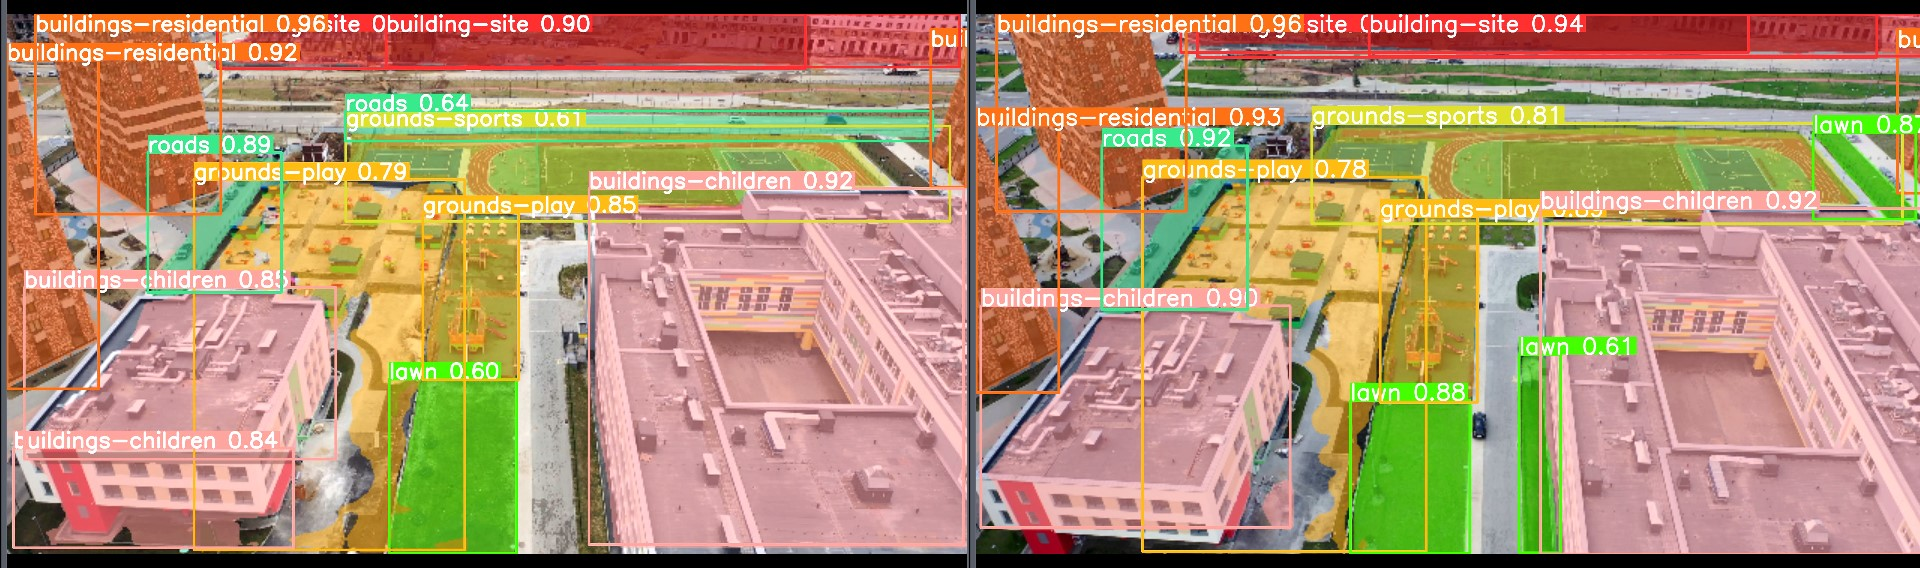

Справа находятся кадры из видео-фрагмента от 27 апреля 2023 года, на котором происходило обучение модели YOLOv8, а слева кадры из аналогичного видео-фрагмента от 31 марта 2023 года.

При сравнении видно, что на новом видео точность сегментации практически не упала на однотипных объектах. Разве только что на классе lawn (Газон, лужайка), т.к. на этом месте 31 марта 2023 года трава ещё отсутствует, либо недостаточно зелёная.

Яма с водой 31 марта больше по размерам, чем 27 апреля. Но очертания её определились достаточно точно.

## **Ссылки на Results от YOLOv8**

### ***С рамками, названиями классов и уверенностью***

[FREE - HDconvert.com] video_fragment_predicted.mp4 (40.1 Мб битрейт 4376 кбит/сек)

https://drive.google.com/file/d/1YxYzhUtKQtSLbbmMOgQNUIJfsOJxxeQW

### ***Только сегментация***

[FREE - HDconvert.com] video_fragment_predicted.mp4 (30.9 Мб битрейт 4376 кбит/сек)

https://drive.google.com/file/d/1Za27YjgDzKiy_xk2jABH3fCkpHdS6oab

## **Ссылка на до-обученную модель yolov8m-seg.pt**

 **best.pt (YOLOv8)**

https://drive.google.com/file/d/1-QuVwTZBmOtMvKiLIJj9fV9izYMDPNLG